### load libraries

In [102]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import plot_confusion_matrix

### import the data we gathered from MSD Taste Profiles and Spotify Web API

In [2]:
msd_spot_df = pd.read_csv('taste_profiles_spotify.csv', index_col=0, header=0, dtype={'userID': str, 'songID': str, 
    'playcount': int, 'trackID': str, 'artist': str, 'title': str, 'trackID_spot': str, 'artistID_spot': str,
    'artistGenres': str, 'artistPop': int, 'trackPop': int, 'trackAcoustic': float, 'trackDanceable': float,
    'trackDurMS': int, 'trackEnergy': float, 'trackInstrum': float, 'trackKey': int, 'trackLoud': float, 'trackMode': int,
    'trackSpeech': float, 'trackTempo': float, 'trackVal': float, 'albumYear': int})

msd_spot_df

,userID,songID,playcount,trackID,artist,title,trackID_spot,artistID_spot,artistGenres,artistPop,...,trackDurMS,trackEnergy,trackInstrum,trackKey,trackLoud,trackMode,trackSpeech,trackTempo,trackVal,albumYear
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,TRIRLYL128F42539D1,Billy Preston,Nothing from Nothing,72PoJMDfdaw9gGECgA9kTZ,0IecGJbdBeYSOVtSPRehh5,"classic soul, funk, psychedelic soul, quiet st...",53,...,156200,0.830,0.011200,9,-3.995,0,0.0283,102.800,0.909,1974
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,TRMHBXZ128F4238406,Paco De Lucia,Entre Dos Aguas,5hVqZ5hnvQGT4LOpUVuJUa,3h8OjAdgYXVRoMZ8jFd6Uw,"flamenco, flamenco guitar, rumba",55,...,360426,0.654,0.874000,4,-12.673,0,0.0349,102.814,0.924,1997
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,TRYQMNI128F147C1C7,Josh Rouse,Under Cold Blue Stars,4HWqzvmeiaddzCDkSQcNxf,38euc5ce2q2MMzaoJcPstz,alternative country,44,...,196333,0.692,0.000008,1,-6.880,1,0.0266,100.614,0.523,2002
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2,TRPLAXZ128F4292406,Jorge Drexler,12 segundos de oscuridad,5GCB9mqJzKN4kDKvmqQ03X,4ssUf5gLb1GBLxi1BhPrVt,"cantautor, latin afrobeat, latin alternative, ...",68,...,164946,0.423,0.001160,7,-9.239,1,0.0302,78.005,0.507,2006
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,TRHNCIR128F42334A5,Kanye West,Stronger,0j2T0R9dR9qdJYsB7ciXhf,5K4W6rqBFWDnAN6FQUkS6x,"chicago rap, rap",92,...,311866,0.717,0.000000,10,-7.858,0,0.1530,103.992,0.490,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10633750,cf8289419383259189afe6bb50c5115fd84f1064,SOHKQSO12A8AE47C9C,10,TRPLVWY12903CC08D3,Everything But The Girl,Time After Time,5RxNm1sQygVKpY9hEOvid5,13ccXrK7AmXb4TddMkE7jy,"electronica, new wave pop, pop rock, sophisti-...",60,...,269360,0.203,0.000006,0,-13.612,1,0.0323,120.370,0.326,1992
10633751,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOABJBU12A8C13F63F,2,TRUDZCV128F42811F6,Cage The Elephant,Back Against The Wall,0vz64VTiPPBpcmla0QvAI9,26T3LtbuGT1Fu9m0eRq5X3,"modern rock, punk blues, rock",75,...,228320,0.743,0.000000,1,-6.163,1,0.0305,110.334,0.534,2009
10633752,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOEISDE12A8AE4632E,1,TRKIBVN128F42283F4,King Kobra,Only The Strong Will Survive,5sUy4vaMwn4YCMPlr0RW0g,60DhbkIV5C2aLGgtpfUw2C,"glam metal, hard rock, sleaze rock",36,...,240372,0.853,0.000000,4,-4.691,1,0.0328,91.632,0.550,1986
10633753,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOHHKGO12AC3DF57BF,1,TRODVNR12903CE6C50,Close Your Eyes,17:20,0IUhBvxsm2pLz6rzEM3YUn,4EJdKdDfQ0XQ4YBhh12xZe,christian hardcore,34,...,136920,0.899,0.089900,11,-4.449,1,0.1680,186.031,0.775,2010


### turn "playcount" into a binary outcome: preferred vs. not preferred

In [3]:
grouped = msd_spot_df.groupby(["userID"]).mean()

C:\Users\sophi\AppData\Local\Temp\ipykernel_20896\2452084082.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = msd_spot_df.groupby(["userID"]).mean()


In [4]:
grouped.reset_index(inplace=True)
grouped

,userID,playcount,artistPop,trackPop,trackAcoustic,trackDanceable,trackDurMS,trackEnergy,trackInstrum,trackKey,trackLoud,trackMode,trackSpeech,trackTempo,trackVal,albumYear
0,00001638d6189236866af9bbf309ae6c2347ffdc,2.500000,63.500000,33.000000,0.547575,0.493000,285256.250000,0.493650,0.001969,3.750000,-10.885750,1.000000,0.067100,125.396250,0.423400,2009.250000
1,0000175652312d12576d9e6b84f600caa24c4715,1.000000,53.000000,29.400000,0.181656,0.596600,286822.800000,0.826600,0.160806,5.000000,-6.492200,0.800000,0.053780,137.183800,0.626400,2001.000000
2,00003a4459f33b92906be11abe0e93efc423c0ff,1.666667,20.333333,11.333333,0.311833,0.485667,239213.000000,0.451000,0.593133,6.333333,-15.645667,0.666667,0.047600,94.348333,0.107467,2005.333333
3,00004fb90a86beb8bed1e9e328f5d9b6ee7dc03e,1.500000,77.500000,40.666667,0.096694,0.412917,244395.083333,0.814417,0.038729,5.250000,-5.675000,0.750000,0.068517,125.641083,0.382417,2007.416667
4,000060ca4e6bea0a5c9037fc1bbd7bbabb98c754,2.000000,32.750000,19.000000,0.021932,0.507750,254516.250000,0.882000,0.232408,5.500000,-6.747250,1.000000,0.052375,136.035500,0.540500,1996.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882475,ffffdc274ca76d154b4e56b2dbc82ff538c93c0b,1.333333,59.666667,38.000000,0.195620,0.590000,217506.500000,0.697333,0.057100,4.333333,-7.302000,0.666667,0.046533,122.707167,0.588833,1992.666667
882476,ffffdc6c89988cd6119067769162948eacf8b670,4.714286,68.285714,47.000000,0.097924,0.533571,257490.857143,0.788714,0.010818,4.142857,-5.777571,0.571429,0.044557,115.878143,0.328429,2008.142857
882477,fffff3e690fcda840b716ce7249d8935ff3323fc,2.250000,59.500000,32.250000,0.272729,0.584250,279796.250000,0.470250,0.000118,5.750000,-11.258500,0.500000,0.093175,133.227750,0.545850,1992.750000
882478,fffff67d54a40927c93d03bd6c816b034b59f087,1.550000,60.350000,22.350000,0.466541,0.460700,250300.550000,0.509470,0.195093,5.750000,-12.852800,0.750000,0.071025,128.900400,0.495750,1992.750000


In [5]:
grouped.drop(columns=['artistPop', 'trackPop', 'trackDurMS', 'trackKey', 'trackLoud', 'trackMode', 'trackTempo', 'albumYear'], inplace=True)
grouped.rename(columns={"playcount": "mean_playcount", "trackAcoustic": "c_acoust", "trackDanceable": "c_dance", "trackEnergy": "c_energy", "trackInstrum": "c_inst", "trackSpeech": "c_speech", "trackVal": "c_val"}, inplace=True)

grouped.head()

,userID,mean_playcount,c_acoust,c_dance,c_energy,c_inst,c_speech,c_val
0,00001638d6189236866af9bbf309ae6c2347ffdc,2.500000,0.547575,0.493000,0.493650,0.001969,0.067100,0.423400
1,0000175652312d12576d9e6b84f600caa24c4715,1.000000,0.181656,0.596600,0.826600,0.160806,0.053780,0.626400
2,00003a4459f33b92906be11abe0e93efc423c0ff,1.666667,0.311833,0.485667,0.451000,0.593133,0.047600,0.107467
3,00004fb90a86beb8bed1e9e328f5d9b6ee7dc03e,1.500000,0.096694,0.412917,0.814417,0.038729,0.068517,0.382417
4,000060ca4e6bea0a5c9037fc1bbd7bbabb98c754,2.000000,0.021932,0.507750,0.882000,0.232408,0.052375,0.540500


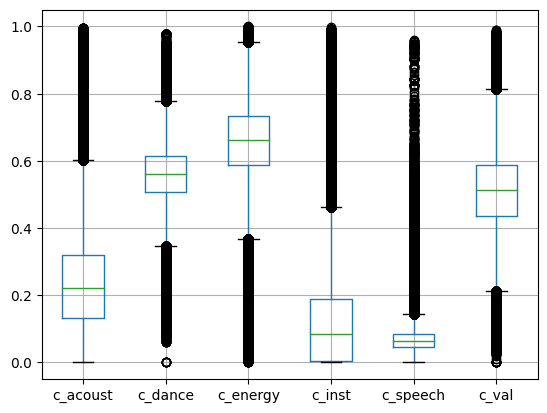

In [6]:
boxplot = grouped.boxplot(column=['c_acoust', 'c_dance', 'c_energy', 'c_inst', 'c_speech', 'c_val'])
plt.show()

In [7]:
merged = msd_spot_df.merge(grouped, how='left', on='userID')
merged.head()

,userID,songID,playcount,trackID,artist,title,trackID_spot,artistID_spot,artistGenres,artistPop,...,trackTempo,trackVal,albumYear,mean_playcount,c_acoust,c_dance,c_energy,c_inst,c_speech,c_val
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,TRIRLYL128F42539D1,Billy Preston,Nothing from Nothing,72PoJMDfdaw9gGECgA9kTZ,0IecGJbdBeYSOVtSPRehh5,"classic soul, funk, psychedelic soul, quiet st...",53,...,102.800,0.909,1974,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,TRMHBXZ128F4238406,Paco De Lucia,Entre Dos Aguas,5hVqZ5hnvQGT4LOpUVuJUa,3h8OjAdgYXVRoMZ8jFd6Uw,"flamenco, flamenco guitar, rumba",55,...,102.814,0.924,1997,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,TRYQMNI128F147C1C7,Josh Rouse,Under Cold Blue Stars,4HWqzvmeiaddzCDkSQcNxf,38euc5ce2q2MMzaoJcPstz,alternative country,44,...,100.614,0.523,2002,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2,TRPLAXZ128F4292406,Jorge Drexler,12 segundos de oscuridad,5GCB9mqJzKN4kDKvmqQ03X,4ssUf5gLb1GBLxi1BhPrVt,"cantautor, latin afrobeat, latin alternative, ...",68,...,78.005,0.507,2006,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,TRHNCIR128F42334A5,Kanye West,Stronger,0j2T0R9dR9qdJYsB7ciXhf,5K4W6rqBFWDnAN6FQUkS6x,"chicago rap, rap",92,...,103.992,0.490,2007,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632


In [8]:
print(len(msd_spot_df))
print(len(merged))

10633755
10633755


In [9]:
merged["Preferred"] = "" #will either be a 1 for YES or 0 for NO

#if user playcount for a song is over their mean, then label it preferred. Else not preferred.
merged['Preferred'] = np.where(merged.playcount >= merged.mean_playcount, '1', '0')

In [10]:
merged

,userID,songID,playcount,trackID,artist,title,trackID_spot,artistID_spot,artistGenres,artistPop,...,trackVal,albumYear,mean_playcount,c_acoust,c_dance,c_energy,c_inst,c_speech,c_val,Preferred
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,TRIRLYL128F42539D1,Billy Preston,Nothing from Nothing,72PoJMDfdaw9gGECgA9kTZ,0IecGJbdBeYSOVtSPRehh5,"classic soul, funk, psychedelic soul, quiet st...",53,...,0.909,1974,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,TRMHBXZ128F4238406,Paco De Lucia,Entre Dos Aguas,5hVqZ5hnvQGT4LOpUVuJUa,3h8OjAdgYXVRoMZ8jFd6Uw,"flamenco, flamenco guitar, rumba",55,...,0.924,1997,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,TRYQMNI128F147C1C7,Josh Rouse,Under Cold Blue Stars,4HWqzvmeiaddzCDkSQcNxf,38euc5ce2q2MMzaoJcPstz,alternative country,44,...,0.523,2002,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,0
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2,TRPLAXZ128F4292406,Jorge Drexler,12 segundos de oscuridad,5GCB9mqJzKN4kDKvmqQ03X,4ssUf5gLb1GBLxi1BhPrVt,"cantautor, latin afrobeat, latin alternative, ...",68,...,0.507,2006,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,TRHNCIR128F42334A5,Kanye West,Stronger,0j2T0R9dR9qdJYsB7ciXhf,5K4W6rqBFWDnAN6FQUkS6x,"chicago rap, rap",92,...,0.490,2007,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10633750,cf8289419383259189afe6bb50c5115fd84f1064,SOHKQSO12A8AE47C9C,10,TRPLVWY12903CC08D3,Everything But The Girl,Time After Time,5RxNm1sQygVKpY9hEOvid5,13ccXrK7AmXb4TddMkE7jy,"electronica, new wave pop, pop rock, sophisti-...",60,...,0.326,1992,5.176471,0.322726,0.588647,0.595118,0.087951,0.063988,0.495118,1
10633751,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOABJBU12A8C13F63F,2,TRUDZCV128F42811F6,Cage The Elephant,Back Against The Wall,0vz64VTiPPBpcmla0QvAI9,26T3LtbuGT1Fu9m0eRq5X3,"modern rock, punk blues, rock",75,...,0.534,2009,1.250000,0.132412,0.463000,0.671750,0.022475,0.065475,0.585000,1
10633752,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOEISDE12A8AE4632E,1,TRKIBVN128F42283F4,King Kobra,Only The Strong Will Survive,5sUy4vaMwn4YCMPlr0RW0g,60DhbkIV5C2aLGgtpfUw2C,"glam metal, hard rock, sleaze rock",36,...,0.550,1986,1.250000,0.132412,0.463000,0.671750,0.022475,0.065475,0.585000,0
10633753,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOHHKGO12AC3DF57BF,1,TRODVNR12903CE6C50,Close Your Eyes,17:20,0IUhBvxsm2pLz6rzEM3YUn,4EJdKdDfQ0XQ4YBhh12xZe,christian hardcore,34,...,0.775,2010,1.250000,0.132412,0.463000,0.671750,0.022475,0.065475,0.585000,0


### what is the ratio of preferred to not preferred in the dataset?

We want the distribution of classes to be even.

In [11]:
print("Number of preferred observations: ", len(merged[merged["Preferred"]=='1']))
print("Number of not preferred observations: ", len(merged[merged["Preferred"]=='0']))

Number of preferred observations:  3380908
Number of not preferred observations:  7252847


Since there's about half as many preferred vs not preferred samples in our dataset, we will need to resample so that it's even.

### resampling

But before we do random sampling to even the classes, since we have a lot of data (more than we can reasonably load into the ML algorithm with the current hardware), lets only select the users which have the largest range in number of playcounts within their data.

Recall that we did some cleaning of this nature at an earlier stage of the project, to ensure that there was at least some variance in number of playcounts within each user. However we were not very strict with this thresholding. Given the low classification accuracy we have observed so far, perhaps this variance needs to be even greater in our data sample in order to achieve better results.

In [12]:
grouped_range = msd_spot_df.groupby(["userID"]).var()
grouped_range.reset_index(inplace=True)

grouped_range.drop(columns=['artistPop', 'trackPop', 'trackAcoustic', 'trackDanceable', 'trackDurMS', 'trackEnergy', 'trackInstrum', 'trackKey', 'trackLoud', 'trackMode', 'trackSpeech', 'trackTempo', 'trackVal', 'albumYear'], inplace=True)

grouped_range['toRemove'] = False #mark users to remove

grouped_range.head()

C:\Users\sophi\AppData\Local\Temp\ipykernel_20896\3184403036.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_range = msd_spot_df.groupby(["userID"]).var()


,userID,playcount,toRemove
0,00001638d6189236866af9bbf309ae6c2347ffdc,9.000000,False
1,0000175652312d12576d9e6b84f600caa24c4715,0.000000,False
2,00003a4459f33b92906be11abe0e93efc423c0ff,1.333333,False
3,00004fb90a86beb8bed1e9e328f5d9b6ee7dc03e,0.636364,False
4,000060ca4e6bea0a5c9037fc1bbd7bbabb98c754,4.000000,False


In [13]:
grouped_range['playcount'].describe()

count    8.410360e+05
mean     5.241256e+01
std      2.728943e+03
min      0.000000e+00
25%      5.535714e-01
50%      3.000000e+00
75%      1.250000e+01
max      2.071831e+06
Name: playcount, dtype: float64

In [14]:
grouped_range.loc[grouped_range['playcount'] < 3, 'toRemove'] = True
print(len(grouped_range[grouped_range['toRemove']==True]), "users marked to remove out of ", len(grouped_range))

419987 users marked to remove out of  882480


In [15]:
df = grouped_range[grouped_range['toRemove']==False]
df.reset_index(inplace=True, drop=True)
df.describe()

,playcount
count,4.210490e+05
mean,1.038245e+02
std,3.856190e+03
min,3.000000e+00
25%,5.554656e+00
50%,1.250000e+01
75%,3.725000e+01
max,2.071831e+06


In [16]:
grouped_range.drop(columns=['playcount'], inplace=True)

merged = merged.merge(grouped_range, how='left', on='userID')
merged.head()

,userID,songID,playcount,trackID,artist,title,trackID_spot,artistID_spot,artistGenres,artistPop,...,albumYear,mean_playcount,c_acoust,c_dance,c_energy,c_inst,c_speech,c_val,Preferred,toRemove
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,TRIRLYL128F42539D1,Billy Preston,Nothing from Nothing,72PoJMDfdaw9gGECgA9kTZ,0IecGJbdBeYSOVtSPRehh5,"classic soul, funk, psychedelic soul, quiet st...",53,...,1974,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,0,True
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,TRMHBXZ128F4238406,Paco De Lucia,Entre Dos Aguas,5hVqZ5hnvQGT4LOpUVuJUa,3h8OjAdgYXVRoMZ8jFd6Uw,"flamenco, flamenco guitar, rumba",55,...,1997,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,1,True
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,TRYQMNI128F147C1C7,Josh Rouse,Under Cold Blue Stars,4HWqzvmeiaddzCDkSQcNxf,38euc5ce2q2MMzaoJcPstz,alternative country,44,...,2002,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,0,True
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2,TRPLAXZ128F4292406,Jorge Drexler,12 segundos de oscuridad,5GCB9mqJzKN4kDKvmqQ03X,4ssUf5gLb1GBLxi1BhPrVt,"cantautor, latin afrobeat, latin alternative, ...",68,...,2006,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,1,True
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,TRHNCIR128F42334A5,Kanye West,Stronger,0j2T0R9dR9qdJYsB7ciXhf,5K4W6rqBFWDnAN6FQUkS6x,"chicago rap, rap",92,...,2007,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,0,True


In [17]:
print(len(msd_spot_df))
print(len(merged))

10633755
10633755


In [18]:
# drop marked observations
print(len(merged['userID'].unique()), "original users in df")
print("removing", len(merged[merged['toRemove']==True]["userID"].unique()), "users...")

merged.drop(index=merged[merged['toRemove']==True].index, inplace=True)
merged.reset_index(inplace=True, drop=True)

print(len(merged['userID'].unique()), "users remaining in df")

merged.head()

882480 original users in df
removing 419987 users...
462493 users remaining in df


,userID,songID,playcount,trackID,artist,title,trackID_spot,artistID_spot,artistGenres,artistPop,...,albumYear,mean_playcount,c_acoust,c_dance,c_energy,c_inst,c_speech,c_val,Preferred,toRemove
0,969cc6fb74e076a68e36a04409cb9d3765757508,SOABRAB12A6D4F7AAF,2,TRSPWDC128F145309C,Depeche Mode,A Pain That Im Used To,2pbZiAFyhKPmVyjIHipYLa,762310PdDnwsDxAQxzQkfX,"dance rock, new romantic, new wave, permanent ...",76,...,2005,3.5,0.329268,0.5776,0.5842,0.023896,0.08148,0.569,0,False
1,969cc6fb74e076a68e36a04409cb9d3765757508,SOAOQFD12A6D4FAAA9,1,TRSGIYX128F149F01F,Boys Night Out,Medicating,7FTORbr7wFdglftJdbz1dw,4wM8eTlGUeleEqowJc2iiZ,"canadian post-hardcore, emo, pop punk, post-ha...",32,...,2005,3.5,0.329268,0.5776,0.5842,0.023896,0.08148,0.569,0,False
2,969cc6fb74e076a68e36a04409cb9d3765757508,SOBFPJC12A58A7D1AB,9,TRBMYRP128F14A4743,Tommy James And The Shondells,Crystal Blue Persuasion,6FXwTBdpv4wD0G0Sz3Wxn4,01hRNr3yF5bYnPq4wZ88iI,"bubblegum pop, classic garage rock, classic ro...",57,...,1989,3.5,0.329268,0.5776,0.5842,0.023896,0.08148,0.569,1,False
3,969cc6fb74e076a68e36a04409cb9d3765757508,SOBZZDU12A6310D8A3,2,TRGWWRE128E0781CDE,Crowded House,Don't Dream It's Over,7G7tgVYORlDuVprcYHuFJh,7ohlPA8dRBtCf92zaZCaaB,"australian rock, mellow gold, permanent wave, ...",67,...,1986,3.5,0.329268,0.5776,0.5842,0.023896,0.08148,0.569,0,False
4,969cc6fb74e076a68e36a04409cb9d3765757508,SOCFPEA12A6701CD37,1,TRYAKVM128E0788A2E,Dilated Peoples,Marathon,1B5jl21yXdsuTXmNx31DlQ,56OMwqr8qaLIRH4ZrvvdXq,"alternative hip hop, hardcore hip hop, hip hop...",51,...,2004,3.5,0.329268,0.5776,0.5842,0.023896,0.08148,0.569,0,False


In [19]:
# now lets check the distribution of classes again

print("Number of preferred observations: ", len(merged[merged["Preferred"]=='1']))
print("Number of not preferred observations: ", len(merged[merged["Preferred"]=='0']))

Number of preferred observations:  1731052
Number of not preferred observations:  4033763


In [20]:
# still very skewed towards not preferred, so lets balance the classes

sampled = merged[merged["Preferred"]=='0'].sample(n=len(merged[merged["Preferred"]=='1']), random_state=42)
sampled

,userID,songID,playcount,trackID,artist,title,trackID_spot,artistID_spot,artistGenres,artistPop,...,albumYear,mean_playcount,c_acoust,c_dance,c_energy,c_inst,c_speech,c_val,Preferred,toRemove
4456385,032a710dc8ec913f731456b375909c1bff2d36c1,SOCZVRV12A8C140216,1,TRTKQFV128F931FD84,Beyoncé feat. Jay-Z,Welcome To Hollywood,1ouHuqrpM2NlyOSoQqZvSP,6vWDO969PvNqNYHIOW5v0m,"dance pop, pop, r&b",89,...,2007,2.500000,0.145944,0.579389,0.712917,0.063469,0.104842,0.615944,0,False
305097,0def638f4ce4a048d7755edf7fff6940364f2252,SOBRMLS12A58A7A835,1,TRHXINO128F9334F85,Phosphorescent,Walkin',3R9lVk52fLlE7ANDVPSzz9,57kIMCLPgkzQlXjblX7XXP,"alternative americana, chamber pop, indie folk...",52,...,2009,2.250000,0.398438,0.466841,0.540452,0.221116,0.049317,0.416291,0,False
4972360,5fc0b24fbc7a8bba1af710575161dff10ac1496f,SODLJOX12A58A7B673,2,TRDCFFH128F428E462,The White Stripes,Little Cream Soda,6c8EgiX8YLkb3dmQHCEbfN,4F84IBURUo98rz4r61KF70,"alternative rock, blues rock, detroit rock, ga...",73,...,2007,2.903846,0.189395,0.521942,0.714212,0.093885,0.099692,0.495590,0,False
1998872,a70c0ff7a04934585b1c3461fd75a9fcb749ab91,SOEYTSI12A8AE48283,1,TRCAEQI128F425C923,Go-Go's,Can't Stop The World,0ZrRP1WKxaEX6TVAMttCuT,2mG8HHQ9S9kcbjcrb5N1FE,"album rock, candy pop, girl group, jangle pop,...",57,...,1981,2.470588,0.412342,0.504765,0.524824,0.020107,0.050135,0.618941,0,False
5606470,9e361c5ebf12a68a13d2f82090ebff92daa8f924,SOBXUVB12AB0188BCF,1,TRCNVFQ12903CD037A,Kato,Hey Shorty (Yeah Yeah Pt. II) (Feat. U$O & Joh...,6wypFud9yFrGL7ruaWXSiO,4KXIxHcPgLB1xiPXZHlqxf,"panamanian pop, urbano latino",46,...,2023,3.125000,0.150716,0.726125,0.749000,0.017443,0.055575,0.637250,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894425,b2401df4262fcfa62be8f3d557ec6b5b8d162352,SOCTOZW12A8C13AE90,1,TRBVSQT128F427A82F,Foals,Electric Bloom,1pONfzmIF8EUd00VvJVObj,6FQqZYVfTNQ1pCqfkwVFEa,"alternative dance, indie rock, modern rock, ne...",66,...,2008,3.045455,0.327366,0.523045,0.583132,0.252594,0.055114,0.329164,0,False
5413258,09d88ceb4d117321088818c9e958a349737576fe,SODUJPC12A6D4F81DB,1,TRYCYSD128F148CF20,Toby Keith,Hold You_ Kiss You_ Love You,5xuunRAGcvZ9o0DHjcy69v,2bA6fzP0lMAQ4kz6CF61w8,"contemporary country, country, country road, o...",70,...,1999,1.850000,0.199171,0.580800,0.670350,0.077071,0.086425,0.504070,0,False
3797137,08aa1298fefadc4fd0a000287d52aa08f8b616df,SOGSVYV12A58A79793,1,TRNQLPA128F92DF46B,Thursday,Division St.,3CzZpfMmfvB8ybUkqAYqvD,61awhbNK16ku1uQyXRsQj5,"emo, new jersey hardcore, pop punk, post-hardc...",48,...,2003,2.181818,0.256623,0.534091,0.686636,0.272272,0.042600,0.390209,0,False
3405573,6610cb7a1576f76893651b7f7f4b59179b3ac4cc,SODTVRC12A8C13927D,3,TRZXXUA128F92EF7EB,Il Divo,Nella Fantasia,5488bXg2eTn4NXTq1VvPGT,3KNZ9AOjBajjmr6ZR2VGfl,operatic pop,60,...,2012,3.692308,0.492486,0.569923,0.500692,0.083947,0.053469,0.421977,0,False


In [21]:
indices1 = list(sampled.index)
indices2 = list(merged[merged["Preferred"]=='1'].index)
indices1.extend(indices2)
len(indices1)

3462104

In [22]:
nn_df = merged.iloc[indices1,:]
nn_df

,userID,songID,playcount,trackID,artist,title,trackID_spot,artistID_spot,artistGenres,artistPop,...,albumYear,mean_playcount,c_acoust,c_dance,c_energy,c_inst,c_speech,c_val,Preferred,toRemove
4456385,032a710dc8ec913f731456b375909c1bff2d36c1,SOCZVRV12A8C140216,1,TRTKQFV128F931FD84,Beyoncé feat. Jay-Z,Welcome To Hollywood,1ouHuqrpM2NlyOSoQqZvSP,6vWDO969PvNqNYHIOW5v0m,"dance pop, pop, r&b",89,...,2007,2.500000,0.145944,0.579389,0.712917,0.063469,0.104842,0.615944,0,False
305097,0def638f4ce4a048d7755edf7fff6940364f2252,SOBRMLS12A58A7A835,1,TRHXINO128F9334F85,Phosphorescent,Walkin',3R9lVk52fLlE7ANDVPSzz9,57kIMCLPgkzQlXjblX7XXP,"alternative americana, chamber pop, indie folk...",52,...,2009,2.250000,0.398438,0.466841,0.540452,0.221116,0.049317,0.416291,0,False
4972360,5fc0b24fbc7a8bba1af710575161dff10ac1496f,SODLJOX12A58A7B673,2,TRDCFFH128F428E462,The White Stripes,Little Cream Soda,6c8EgiX8YLkb3dmQHCEbfN,4F84IBURUo98rz4r61KF70,"alternative rock, blues rock, detroit rock, ga...",73,...,2007,2.903846,0.189395,0.521942,0.714212,0.093885,0.099692,0.495590,0,False
1998872,a70c0ff7a04934585b1c3461fd75a9fcb749ab91,SOEYTSI12A8AE48283,1,TRCAEQI128F425C923,Go-Go's,Can't Stop The World,0ZrRP1WKxaEX6TVAMttCuT,2mG8HHQ9S9kcbjcrb5N1FE,"album rock, candy pop, girl group, jangle pop,...",57,...,1981,2.470588,0.412342,0.504765,0.524824,0.020107,0.050135,0.618941,0,False
5606470,9e361c5ebf12a68a13d2f82090ebff92daa8f924,SOBXUVB12AB0188BCF,1,TRCNVFQ12903CD037A,Kato,Hey Shorty (Yeah Yeah Pt. II) (Feat. U$O & Joh...,6wypFud9yFrGL7ruaWXSiO,4KXIxHcPgLB1xiPXZHlqxf,"panamanian pop, urbano latino",46,...,2023,3.125000,0.150716,0.726125,0.749000,0.017443,0.055575,0.637250,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764793,ca99d94daa9d5231643a08aac2f3bfb645e73b09,SOEMEDW12A8C138BB8,10,TRKBIAR128F428B76C,HorrorPops,Walk Like A Zombie,0F56U0Bvvjh0QcqG21USyO,7MvgOAoxA9ZgOxtRBYxLWJ,"danish punk, horror punk, psychobilly",35,...,2005,9.555556,0.374389,0.520000,0.716444,0.016073,0.077800,0.512756,1,False
5764795,ca99d94daa9d5231643a08aac2f3bfb645e73b09,SOFGYQW12A8C140022,12,TRXYXEV128F9320B12,Atom And His Package,Possession (Not The One By Danzig),5rjHjSYQFYkNLquP4L0ktr,4I6LjrgKVERp2HF7y5LbkF,"electropowerpop, folk punk, geek rock, one-per...",26,...,2003,9.555556,0.374389,0.520000,0.716444,0.016073,0.077800,0.512756,1,False
5764800,cf8289419383259189afe6bb50c5115fd84f1064,SOASBIM12A58A7B2DB,42,TRVSETD128F1477BE2,Afrika Bambaataa & The Soul Sonic Force,Don't Stop...Planet Rock (In The Pocket Mix) f...,4FupIlegZgvXUuK79qcoKW,7cg61q8kK8jlFi8TKKw70p,"bronx hip hop, east coast hip hop, electro, hi...",45,...,1982,5.176471,0.322726,0.588647,0.595118,0.087951,0.063988,0.495118,1,False
5764810,cf8289419383259189afe6bb50c5115fd84f1064,SOFCDDN12A58A7D3E1,12,TRMIAQM128F4277AC3,The Gaslight Anthem,Old White Lincoln,5NO0JLiwJft7LCzlW2LxFg,7If8DXZN7mlGdQkLE2FaMo,"heartland rock, new jersey hardcore, new jerse...",56,...,2009,5.176471,0.322726,0.588647,0.595118,0.087951,0.063988,0.495118,1,False


In [23]:
print("Number of preferred observations: ", len(nn_df[nn_df["Preferred"]=='1']))
print("Number of not preferred observations: ", len(nn_df[nn_df["Preferred"]=='0']))

Number of preferred observations:  1731052
Number of not preferred observations:  1731052


In [24]:
nn_df.reset_index(inplace=True, drop=True)
nn_df.head()

,userID,songID,playcount,trackID,artist,title,trackID_spot,artistID_spot,artistGenres,artistPop,...,albumYear,mean_playcount,c_acoust,c_dance,c_energy,c_inst,c_speech,c_val,Preferred,toRemove
0,032a710dc8ec913f731456b375909c1bff2d36c1,SOCZVRV12A8C140216,1,TRTKQFV128F931FD84,Beyoncé feat. Jay-Z,Welcome To Hollywood,1ouHuqrpM2NlyOSoQqZvSP,6vWDO969PvNqNYHIOW5v0m,"dance pop, pop, r&b",89,...,2007,2.500000,0.145944,0.579389,0.712917,0.063469,0.104842,0.615944,0,False
1,0def638f4ce4a048d7755edf7fff6940364f2252,SOBRMLS12A58A7A835,1,TRHXINO128F9334F85,Phosphorescent,Walkin',3R9lVk52fLlE7ANDVPSzz9,57kIMCLPgkzQlXjblX7XXP,"alternative americana, chamber pop, indie folk...",52,...,2009,2.250000,0.398438,0.466841,0.540452,0.221116,0.049317,0.416291,0,False
2,5fc0b24fbc7a8bba1af710575161dff10ac1496f,SODLJOX12A58A7B673,2,TRDCFFH128F428E462,The White Stripes,Little Cream Soda,6c8EgiX8YLkb3dmQHCEbfN,4F84IBURUo98rz4r61KF70,"alternative rock, blues rock, detroit rock, ga...",73,...,2007,2.903846,0.189395,0.521942,0.714212,0.093885,0.099692,0.495590,0,False
3,a70c0ff7a04934585b1c3461fd75a9fcb749ab91,SOEYTSI12A8AE48283,1,TRCAEQI128F425C923,Go-Go's,Can't Stop The World,0ZrRP1WKxaEX6TVAMttCuT,2mG8HHQ9S9kcbjcrb5N1FE,"album rock, candy pop, girl group, jangle pop,...",57,...,1981,2.470588,0.412342,0.504765,0.524824,0.020107,0.050135,0.618941,0,False
4,9e361c5ebf12a68a13d2f82090ebff92daa8f924,SOBXUVB12AB0188BCF,1,TRCNVFQ12903CD037A,Kato,Hey Shorty (Yeah Yeah Pt. II) (Feat. U$O & Joh...,6wypFud9yFrGL7ruaWXSiO,4KXIxHcPgLB1xiPXZHlqxf,"panamanian pop, urbano latino",46,...,2023,3.125000,0.150716,0.726125,0.749000,0.017443,0.055575,0.637250,0,False


### create a quantitative preference distance metric for each song and user

It's based off of the following attributes from our dataset:
- trackAcoustic
- trackDanceable
- trackEnergy
- trackInstrum
- trackSpeech
- trackVal

In [26]:
nn_df["pref_dist_Ac"] = 0
nn_df["pref_dist_Da"] = 0
nn_df["pref_dist_En"] = 0
nn_df["pref_dist_In"] = 0
nn_df["pref_dist_Sp"] = 0
nn_df["pref_dist_Va"] = 0

counter = 0
for i,row in nn_df.iterrows():
    #for each song for that user, calculate how close the song is to that 6 dimensional centroid/average value
    
    nn_df.loc[i, "pref_dist_Ac"] = abs(row["c_acoust"]-row["trackAcoustic"])
    nn_df.loc[i, "pref_dist_Da"] = abs(row["c_dance"]-row["trackDanceable"])
    nn_df.loc[i, "pref_dist_En"] = abs(row["c_energy"]-row["trackEnergy"])
    nn_df.loc[i, "pref_dist_In"] = abs(row["c_inst"]-row["trackInstrum"])
    nn_df.loc[i, "pref_dist_Sp"] = abs(row["c_speech"]-row["trackSpeech"])
    nn_df.loc[i, "pref_dist_Va"] = abs(row["c_val"]-row["trackVal"])
    
    counter += 1
    if counter%10000==0: print(counter)

C:\Users\sophi\AppData\Local\Temp\ipykernel_20896\1850492808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn_df["pref_dist_Ac"] = 0
C:\Users\sophi\AppData\Local\Temp\ipykernel_20896\1850492808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn_df["pref_dist_Da"] = 0
C:\Users\sophi\AppData\Local\Temp\ipykernel_20896\1850492808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390

In [27]:
nn_df

,userID,songID,playcount,trackID,artist,title,trackID_spot,artistID_spot,artistGenres,artistPop,...,c_speech,c_val,Preferred,toRemove,pref_dist_Ac,pref_dist_Da,pref_dist_En,pref_dist_In,pref_dist_Sp,pref_dist_Va
0,032a710dc8ec913f731456b375909c1bff2d36c1,SOCZVRV12A8C140216,1,TRTKQFV128F931FD84,Beyoncé feat. Jay-Z,Welcome To Hollywood,1ouHuqrpM2NlyOSoQqZvSP,6vWDO969PvNqNYHIOW5v0m,"dance pop, pop, r&b",89,...,0.104842,0.615944,0,False,0.134144,0.227611,0.071083,0.063345,0.131158,0.164056
1,0def638f4ce4a048d7755edf7fff6940364f2252,SOBRMLS12A58A7A835,1,TRHXINO128F9334F85,Phosphorescent,Walkin',3R9lVk52fLlE7ANDVPSzz9,57kIMCLPgkzQlXjblX7XXP,"alternative americana, chamber pop, indie folk...",52,...,0.049317,0.416291,0,False,0.221562,0.263841,0.092452,0.123216,0.017117,0.077709
2,5fc0b24fbc7a8bba1af710575161dff10ac1496f,SODLJOX12A58A7B673,2,TRDCFFH128F428E462,The White Stripes,Little Cream Soda,6c8EgiX8YLkb3dmQHCEbfN,4F84IBURUo98rz4r61KF70,"alternative rock, blues rock, detroit rock, ga...",73,...,0.099692,0.495590,0,False,0.184445,0.156942,0.117788,0.089005,0.008392,0.140590
3,a70c0ff7a04934585b1c3461fd75a9fcb749ab91,SOEYTSI12A8AE48283,1,TRCAEQI128F425C923,Go-Go's,Can't Stop The World,0ZrRP1WKxaEX6TVAMttCuT,2mG8HHQ9S9kcbjcrb5N1FE,"album rock, candy pop, girl group, jangle pop,...",57,...,0.050135,0.618941,0,False,0.242342,0.032765,0.409176,0.019991,0.002435,0.204059
4,9e361c5ebf12a68a13d2f82090ebff92daa8f924,SOBXUVB12AB0188BCF,1,TRCNVFQ12903CD037A,Kato,Hey Shorty (Yeah Yeah Pt. II) (Feat. U$O & Joh...,6wypFud9yFrGL7ruaWXSiO,4KXIxHcPgLB1xiPXZHlqxf,"panamanian pop, urbano latino",46,...,0.055575,0.637250,0,False,0.012284,0.033875,0.025000,0.017295,0.037925,0.120750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3462099,ca99d94daa9d5231643a08aac2f3bfb645e73b09,SOEMEDW12A8C138BB8,10,TRKBIAR128F428B76C,HorrorPops,Walk Like A Zombie,0F56U0Bvvjh0QcqG21USyO,7MvgOAoxA9ZgOxtRBYxLWJ,"danish punk, horror punk, psychobilly",35,...,0.077800,0.512756,1,False,0.374084,0.100000,0.109556,0.015831,0.042600,0.221244
3462100,ca99d94daa9d5231643a08aac2f3bfb645e73b09,SOFGYQW12A8C140022,12,TRXYXEV128F9320B12,Atom And His Package,Possession (Not The One By Danzig),5rjHjSYQFYkNLquP4L0ktr,4I6LjrgKVERp2HF7y5LbkF,"electropowerpop, folk punk, geek rock, one-per...",26,...,0.077800,0.512756,1,False,0.292489,0.062000,0.277556,0.016070,0.035200,0.025244
3462101,cf8289419383259189afe6bb50c5115fd84f1064,SOASBIM12A58A7B2DB,42,TRVSETD128F1477BE2,Afrika Bambaataa & The Soul Sonic Force,Don't Stop...Planet Rock (In The Pocket Mix) f...,4FupIlegZgvXUuK79qcoKW,7cg61q8kK8jlFi8TKKw70p,"bronx hip hop, east coast hip hop, electro, hi...",45,...,0.063988,0.495118,1,False,0.311726,0.326353,0.211882,0.087829,0.066012,0.213882
3462102,cf8289419383259189afe6bb50c5115fd84f1064,SOFCDDN12A58A7D3E1,12,TRMIAQM128F4277AC3,The Gaslight Anthem,Old White Lincoln,5NO0JLiwJft7LCzlW2LxFg,7If8DXZN7mlGdQkLE2FaMo,"heartland rock, new jersey hardcore, new jerse...",56,...,0.063988,0.495118,1,False,0.322100,0.120647,0.282882,0.087951,0.013788,0.310882


### clean up the dataframe

In [28]:
nn_df_clean = pd.DataFrame(nn_df, columns=["pref_dist_Ac", "pref_dist_Da", "pref_dist_En", "pref_dist_In", "pref_dist_Sp", "pref_dist_Va", "Preferred"])
nn_df_clean.head()

,pref_dist_Ac,pref_dist_Da,pref_dist_En,pref_dist_In,pref_dist_Sp,pref_dist_Va,Preferred
0,0.134144,0.227611,0.071083,0.063345,0.131158,0.164056,0
1,0.221562,0.263841,0.092452,0.123216,0.017117,0.077709,0
2,0.184445,0.156942,0.117788,0.089005,0.008392,0.140590,0
3,0.242342,0.032765,0.409176,0.019991,0.002435,0.204059,0
4,0.012284,0.033875,0.025000,0.017295,0.037925,0.120750,0


In [29]:
nn_df_clean.to_csv('nn_data.csv')

### create a smaller sample of data for upload

The file size is currently too large.

In [38]:
indices = list((nn_df_clean[nn_df_clean["Preferred"]=='0'].sample(n=100000, random_state=42)).index)
indices.extend(list((nn_df_clean[nn_df_clean["Preferred"]=='1'].sample(n=100000, random_state=42)).index))
len(indices)

200000

In [39]:
data_sample = nn_df_clean.iloc[indices,:]
data_sample

,pref_dist_Ac,pref_dist_Da,pref_dist_En,pref_dist_In,pref_dist_Sp,pref_dist_Va,Preferred
211966,0.020023,0.238971,0.013226,0.291507,0.013882,0.387403,0
1279901,0.045219,0.118750,0.162500,0.005163,0.002962,0.140625,0
1270764,0.130613,0.168545,0.041000,0.191889,0.041545,0.113055,0
394737,0.531967,0.376923,0.221038,0.002270,0.036469,0.221873,0
572347,0.516988,0.114620,0.283356,0.042022,0.037454,0.141026,0
...,...,...,...,...,...,...,...
1743712,0.229924,0.075000,0.087833,0.039574,0.008050,0.080000,1
2186284,0.012236,0.102824,0.116118,0.055184,0.019271,0.006135,1
2907442,0.317639,0.097608,0.280903,0.117345,0.008882,0.198524,1
2887616,0.145067,0.157667,0.215000,0.000071,0.000500,0.322000,1


In [40]:
data_sample.reset_index(inplace=True, drop=True)
data_sample.head()

,pref_dist_Ac,pref_dist_Da,pref_dist_En,pref_dist_In,pref_dist_Sp,pref_dist_Va,Preferred
0,0.020023,0.238971,0.013226,0.291507,0.013882,0.387403,0
1,0.045219,0.118750,0.162500,0.005163,0.002962,0.140625,0
2,0.130613,0.168545,0.041000,0.191889,0.041545,0.113055,0
3,0.531967,0.376923,0.221038,0.002270,0.036469,0.221873,0
4,0.516988,0.114620,0.283356,0.042022,0.037454,0.141026,0


In [41]:
data_sample.to_csv("nn_data_sample.csv")

### create training and testing splits

80 : 20 split

In [42]:
# shuffle the data
shuffled = data_sample.sample(frac=1, random_state=42)
shuffled.head()

,pref_dist_Ac,pref_dist_Da,pref_dist_En,pref_dist_In,pref_dist_Sp,pref_dist_Va,Preferred
119737,0.015661,0.145000,0.100000,0.209250,0.026875,0.382500,1
72272,0.268236,0.006771,0.163629,0.060473,0.046643,0.160970,0
158154,0.284629,0.412136,0.229500,0.217001,0.079409,0.230318,1
65426,0.147390,0.111750,0.262063,0.046903,0.028409,0.242322,0
30074,0.031313,0.152723,0.197282,0.644244,0.023001,0.186850,0


In [43]:
# grab the first part of the dataframe as the training
splt_at = round(len(data_sample)*0.8)
training = shuffled.iloc[:splt_at, :]
training.head()

,pref_dist_Ac,pref_dist_Da,pref_dist_En,pref_dist_In,pref_dist_Sp,pref_dist_Va,Preferred
119737,0.015661,0.145000,0.100000,0.209250,0.026875,0.382500,1
72272,0.268236,0.006771,0.163629,0.060473,0.046643,0.160970,0
158154,0.284629,0.412136,0.229500,0.217001,0.079409,0.230318,1
65426,0.147390,0.111750,0.262063,0.046903,0.028409,0.242322,0
30074,0.031313,0.152723,0.197282,0.644244,0.023001,0.186850,0


In [44]:
len(training)

160000

In [45]:
print(len(training[training["Preferred"]=='0']))
print(len(training[training["Preferred"]=='1']))

79974
80026


In [46]:
# grab the second part of the dataframe as the testing
testing = shuffled.iloc[splt_at:, :]
testing.head()

,pref_dist_Ac,pref_dist_Da,pref_dist_En,pref_dist_In,pref_dist_Sp,pref_dist_Va,Preferred
39308,0.143173,0.105370,0.046222,0.067263,0.001711,0.261148,0
179236,0.157764,0.344185,0.391063,0.742482,0.014865,0.317257,1
113362,0.388709,0.058222,0.361044,0.370050,0.011150,0.152167,1
94934,0.001936,0.246000,0.231154,0.034566,0.034608,0.043538,0
20509,0.366144,0.156833,0.127833,0.013895,0.052433,0.036750,0


In [47]:
len(testing)

40000

In [48]:
print(len(testing[testing["Preferred"]=='0']))
print(len(testing[testing["Preferred"]=='1']))

20026
19974


In [49]:
training.to_csv("NN_train.csv")
testing.to_csv("NN_test.csv")

### training the model

Building the model with TensorFlow

In [180]:
df_train = pd.read_csv("NN_train.csv", index_col=0)
df_train.head()

,pref_dist_Ac,pref_dist_Da,pref_dist_En,pref_dist_In,pref_dist_Sp,pref_dist_Va,Preferred
119737,0.015661,0.145000,0.100000,0.209250,0.026875,0.382500,1
72272,0.268236,0.006771,0.163629,0.060473,0.046643,0.160970,0
158154,0.284629,0.412136,0.229500,0.217001,0.079409,0.230318,1
65426,0.147390,0.111750,0.262062,0.046903,0.028409,0.242322,0
30074,0.031313,0.152723,0.197282,0.644244,0.023001,0.186850,0


In [181]:
X_train = df_train.iloc[:,0:6].to_numpy()
X_train = X_train.reshape(len(df_train),1,1,6)
inputShape = X_train.shape
print(inputShape)
Y_train = df_train.iloc[:,-1].to_numpy()
Y_train = Y_train.reshape(-1,1,1)
print(Y_train.shape)

(160000, 1, 1, 6)
(160000, 1, 1)


In [229]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(6), #input layer
  tf.keras.layers.Dense(6, activation='relu'), #hidden layer
  tf.keras.layers.Dense(2) #output layer
])

In [230]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [231]:
model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
5000/5000 [==============================] - 18s 3ms/step - loss: 0.2505 - accuracy: 0.4903
Epoch 2/20
5000/5000 [==============================] - 16s 3ms/step - loss: 0.2472 - accuracy: 0.4989
Epoch 3/20
5000/5000 [==============================] - 16s 3ms/step - loss: 0.2471 - accuracy: 0.4979
Epoch 4/20
5000/5000 [==============================] - 16s 3ms/step - loss: 0.2471 - accuracy: 0.4988
Epoch 5/20
5000/5000 [==============================] - 16s 3ms/step - loss: 0.2470 - accuracy: 0.4989
Epoch 6/20
5000/5000 [==============================] - 16s 3ms/step - loss: 0.2470 - accuracy: 0.4991
Epoch 7/20
5000/5000 [==============================] - 16s 3ms/step - loss: 0.2470 - accuracy: 0.4980
Epoch 8/20
5000/5000 [==============================] - 16s 3ms/step - loss: 0.2470 - accuracy: 0.4994
Epoch 9/20
5000/5000 [==============================] - 16s 3ms/step - loss: 0.2469 - accuracy: 0.4999
Epoch 10/20
5000/5000 [==============================] - 16s 3ms/step - l

In [232]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_32 (Flatten)        (32, 6)                   0         
                                                                 
 dense_69 (Dense)            (32, 6)                   42        
                                                                 
 dense_70 (Dense)            (32, 6)                   42        
                                                                 
 dense_71 (Dense)            (32, 2)                   14        
                                                                 
Total params: 98
Trainable params: 98
Non-trainable params: 0
_________________________________________________________________


### evaluate the model

In [186]:
df_test = pd.read_csv("NN_test.csv", index_col=0)
df_test.head()

,pref_dist_Ac,pref_dist_Da,pref_dist_En,pref_dist_In,pref_dist_Sp,pref_dist_Va,Preferred
39308,0.143173,0.105370,0.046222,0.067263,0.001711,0.261148,0
179236,0.157764,0.344185,0.391063,0.742482,0.014865,0.317257,1
113362,0.388709,0.058222,0.361044,0.370050,0.011150,0.152167,1
94934,0.001936,0.246000,0.231154,0.034566,0.034608,0.043538,0
20509,0.366144,0.156833,0.127833,0.013895,0.052433,0.036750,0


In [187]:
X_test = df_test.iloc[:,0:6].to_numpy()
X_test = X_test.reshape(len(df_test),1,1,6)
print(X_test.shape)
Y_test = df_test.iloc[:,-1].to_numpy()
Y_test = Y_test.reshape(-1,1,1)
print(Y_test.shape)

(40000, 1, 1, 6)
(40000, 1, 1)


In [233]:
predictions = np.argmax(tf.nn.sigmoid(model(X_test)).numpy(), axis=1)
predictions

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [234]:
model.evaluate(X_test,  Y_test, verbose=2)

1250/1250 - 3s - loss: 0.2469 - accuracy: 0.5185 - 3s/epoch - 2ms/step


[0.2468770295381546, 0.5184500217437744]

In [235]:
tf.math.confusion_matrix(
    Y_test.reshape(-1,),
    predictions,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[17142,  2884],
       [16378,  3596]])>